# STA365: Applied Bayesian Inference HW 3
---
## Question 1

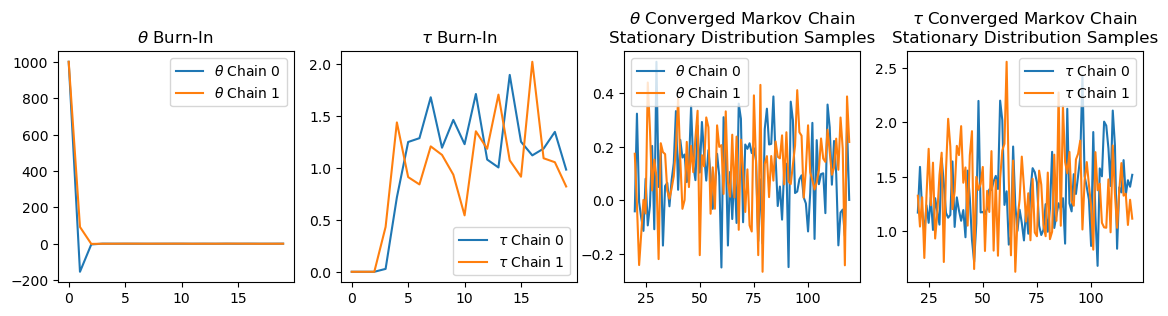

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# loc is mean and scale is standard deviation
n = 30; s = 1; m = 0; x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a=n/2+1, scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(x.mean(),scale=1/(tau[c,g]*n)**0.5).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); plt.show('png')

95% Credible Interval (Mean): [-0.20870128 -0.10375679]
95% Credible Interval (SD): [0.69446853 0.74674828]


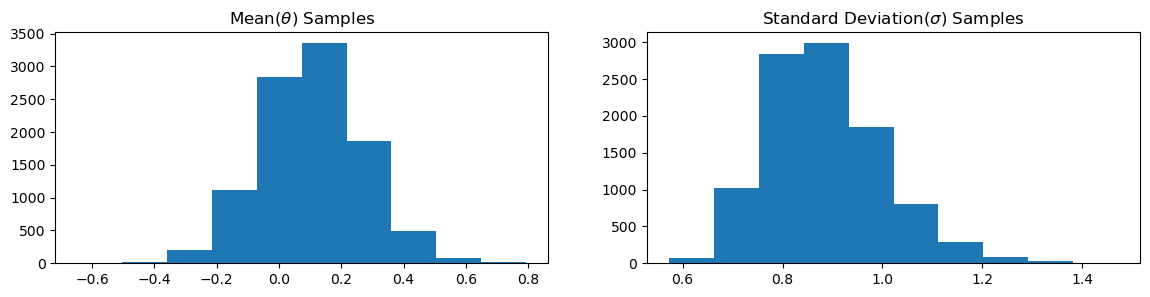

In [44]:
fig,ax = plt.subplots(1,2, figsize=(14,3))
ax[0].hist(theta[0,burn:])
ax[1].hist(1/(tau[0,burn:])**0.5)
ax[0].set_title('Mean($\\theta$) Samples')
ax[1].set_title('Standard Deviation($\\sigma$) Samples')

print("95% Credible Interval (Mean): " + str(np.quantile(theta[0,burn:], [0.025,0.0975])))
print("95% Credible Interval (SD): " + str(np.quantile(1/(tau[0,burn:]**0.5), [0.025,0.0975])))
plt.show('png')

## Question 2


\begin{align}
P(\theta|\tau,x) &\propto P(x|\theta,\tau) P(\theta,\tau) \\
&= P(x|\theta,\tau)P(\theta)P(\tau) \\
&\propto P(x|\theta,\tau)P(\theta) \\
&= \prod^n_{i=1} \sqrt{\frac{\tau}{2\pi}} \exp\{-\frac{\tau}{2} (x_i-\theta)^2\} \cdot \sqrt{\frac{\tau_0}{2\pi}} \exp\{-\frac{\tau_0}{2} (\theta-\theta_0)^2\} \\
&\propto \exp\{\sum^n_{i=1}[-\frac{\tau}{2} (x_i-\theta)^2] - \frac{\tau_0}{2} (\theta-\theta_0)^2\} \\
&= \exp\{-\frac{1}{2}[n\tau(\bar x - \theta)^2 + \tau_0 (\theta-\theta_0)^2]\} \\
&\propto \exp\{-\frac{1}{2}[n\tau(-2\theta \bar x + \theta^2) + \tau_0 (\theta^2-2\theta \theta_0)]\} \\
&= \exp\{-\frac{1}{2}[\theta^2(n\tau+\tau_0)-2\theta(n\tau \bar x + \tau_0 \theta_0)]\} \\
&\propto \exp\{-\frac{n\tau+\tau_0}{2}(\theta-\frac{n\tau \bar x +\tau_0 \theta_0}{n\tau+\tau_0})^2\} \\
&= \exp\{-\frac{n\tau+\tau_0}{2}(\theta-\frac{n\tau \bar x +\tau_0 \theta_0}{n\tau+\tau_0})^2\} \\
&\sim N(\mu = \frac{n\tau \bar x +\tau_0 \theta_0}{n\tau+\tau_0}, \sigma^2 = \frac{1}{n\tau+\tau_0}) 
\end{align}

- $\tau_0 \uparrow \implies \sigma^2 \downarrow$
- $\theta_0 \uparrow \implies \mu \uparrow,$ with $\tau_0$ scaling the effect of $\theta_0$ on the posterior

\begin{align}
P(\tau | \theta,x) &= P(x|\tau, \theta) P(\tau, \theta) \\
&= P(x|\tau,\theta) P(\tau)P(\theta) \\
&\propto P(x| \tau, \theta) P(\tau) \\
&= \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} \exp\{-\frac{\tau}{2}(x_i-\theta)^2\} \cdot \tau^{\alpha/2-1} Exp\{-\frac{\lambda}{2}\tau\} \\
&\propto \tau^{\frac{n+\alpha}{2}-1} \exp\{-\frac{n\tau}{2}(\bar x-\theta)^2-\frac{\lambda\tau}{2}\} \\
&= \tau^{\frac{n+\alpha}{2}-1} \exp\{-\tau \frac{n(\bar x-\theta)^2+\lambda}{2}\} \\
&\sim Gamma(Shape = \frac{n+\alpha}{2}, Rate = \frac{n(\bar x-\theta)^2+\lambda}{2})
\end{align}

- $\frac{\lambda}{2}, \frac{\alpha}{2} \rightarrow 0 \implies$ the posterior converges to the previous posterior with $P(\tau) = P(\theta) = 1$
- $\frac{\lambda}{2}, \frac{\alpha}{2} \uparrow \implies Shape,\ Rate \uparrow$

Generally, the higher the hyperparameters of the priors, the greater the "number of data points" contributed to the posterior by the prior relative to the "number of data points" contributed by the likelihood.

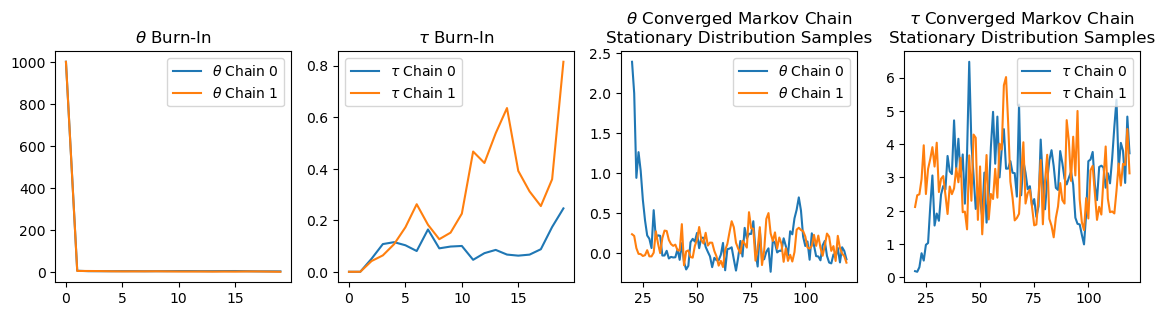

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# loc is mean and scale is standard deviation
n = 30; s = 1; m = 0; x = stats.norm(loc=m, scale=s).rvs(size=n)
alpha, lamb = 10,10
theta0, tau0 = 5,5
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a=(n+alpha)/2, scale=2/(n*(x.mean()-theta[c,g-1])**2+lamb)).rvs()
        theta[c,g] = stats.norm(loc=(n*tau[c,g]*x.mean() + tau0*theta0)/(n*tau[c,g]+tau0),scale=1/(n*tau[c,g] + tau0)**0.5).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); plt.show('png')

## Question 3

Given $P(\theta)$ is a valid distribution $\implies P(\theta|x) \propto P(\theta,x)=P(x|\theta)P(\theta)$ because x, the data, is given, therefore $P(x)$ is a constant. With this relationship between posterior and joint distribution, by reparameterizing the joint distribution, the exact distribution of the posterior can be determined. However, determining the exact distribution of the posterior is not that important in Bayesian Statistics because we care more about the samples drawn from the distribution (for histograms and belief statements) rather than the distribution itself.